# 1. Clusterización K-Means

**Objetivo:** hacer una clusterización de sismos históricos globales.

El centro nacional de información de sismos (NEIC) determina la ubicación y magnitud de los sismos más importantes que han ocurrido en el mundo y disemina esta información inmediatament a agencias nacionales e internacionales. 

https://www.kaggle.com/usgs/earthquake-database

**Información de las características**
This dataset includes a record of the date, time, location, depth, magnitude, and source of every earthquake with a reported magnitude 5.5 or higher since 1965.

* 0 Date
* 1 Time
* 2 Location
* 3 Depth
* 4 Magnitude
* 5 Source of the earthquake


**Número de instancias:** 23412

# 2. Autenticación de drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 3. Importando librerías

In [77]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 4. Lectura del archivo y visualización de los datos

In [43]:
path = r'/content/drive/Shareddrives/Data Science para Geociencias/6. Métodos de ML/6.5 Clusterización'
name = 'NEIC_Earthquakes.csv'

In [60]:
sis_path = os.path.join(path,name)
sismosdf = pd.read_csv(sis_path)
sismosdf.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


Observemos que tenemos muchos campos con NaN, ¿Eliminamos las filas con NaN o las columnas?.
Visualizaremos que tan vacío está el dataframe con un mapa de calor

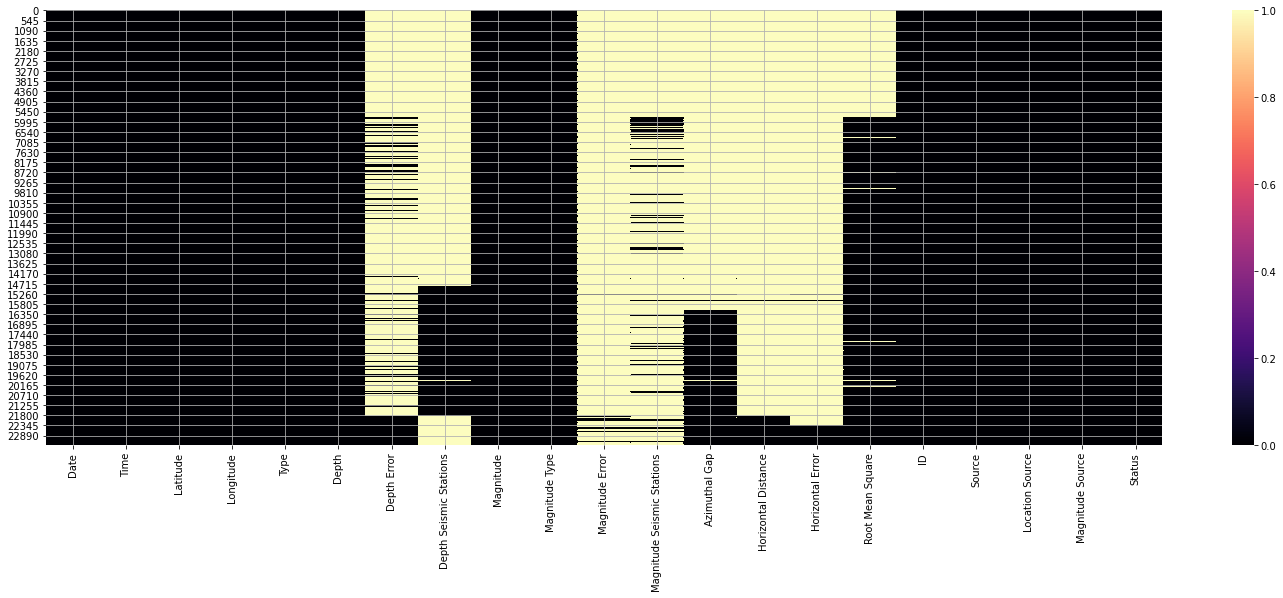

In [45]:
fig, ax = plt.subplots(figsize=(25,8))
sns.heatmap(sismosdf.isnull(), ax=ax, cmap="magma")
plt.grid()
plt.show()

In [46]:
sismosdf.shape

(23412, 21)

# 5. Limpieza de los datos

Eliminar columnas con mayoría de campos indefinidos

In [61]:
sismosdf.drop(['Date', 'Time','Depth Error', 'Depth Seismic Stations', 'Magnitude Error',
               'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance',
               'Horizontal Error', 'Root Mean Square', 'ID', 'Magnitude Type',
               'Status', 'Source', 'Location Source', 'Magnitude Source'], axis=1, inplace=True)

In [62]:
print(sismosdf.shape)
sismosdf.head()

(23412, 5)


,Latitude,Longitude,Type,Depth,Magnitude
0,19.246,145.616,Earthquake,131.6,6.0
1,1.863,127.352,Earthquake,80.0,5.8
2,-20.579,-173.972,Earthquake,20.0,6.2
3,-59.076,-23.557,Earthquake,15.0,5.8
4,11.938,126.427,Earthquake,15.0,5.8


Eliminación de instancias (filas) con valores idefinidos

In [64]:
sismosdf.dropna(axis=0, inplace=True)

In [65]:
sismosdf.shape

(23412, 5)

# 6. Exploración de los datos de sismos históricos

#### Revisando las columnas: Type, Magnitude



##### Columna de magnitud

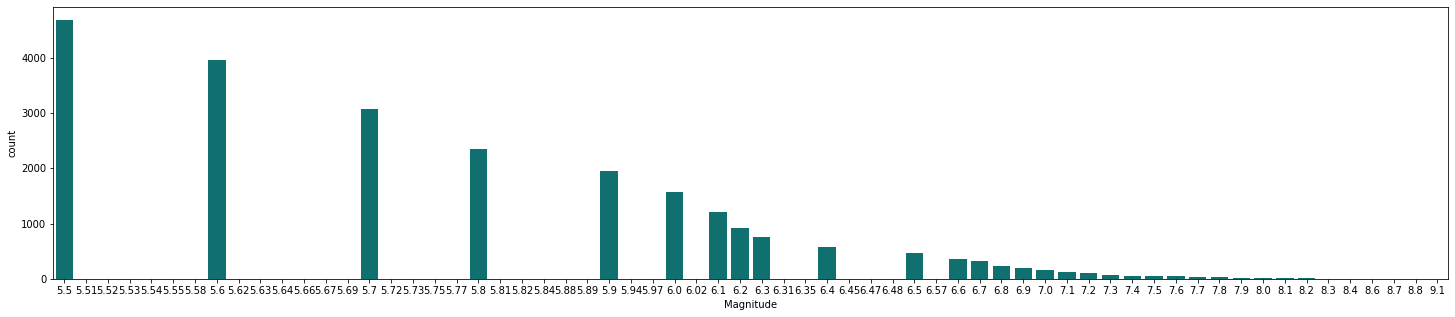

In [66]:
fig, ax = plt.subplots(figsize=(25,5))
sns.countplot(ax=ax, x=sismosdf['Magnitude'], color='teal')
plt.show()

##### Columna Type

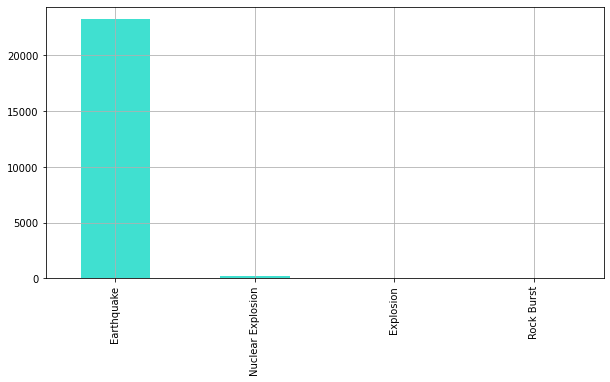

In [67]:
sismosdf['Type'].value_counts().plot(kind='bar', figsize=(10,5), grid=True, color='turquoise')

In [68]:
sismosdf = sismosdf[sismosdf.Type == 'Earthquake']
sismosdf.drop(['Type'], axis=1, inplace=True)

In [69]:
sismosdf.head()

,Latitude,Longitude,Depth,Magnitude
0,19.246,145.616,131.6,6.0
1,1.863,127.352,80.0,5.8
2,-20.579,-173.972,20.0,6.2
3,-59.076,-23.557,15.0,5.8
4,11.938,126.427,15.0,5.8


In [70]:
sismosdf.describe()

,Latitude,Longitude,Depth,Magnitude
count,23232.000000,23232.000000,23232.000000,23232.000000
mean,1.386383,39.746049,71.313913,5.882763
std,29.929060,125.751903,122.968384,0.424032
min,-77.080000,-179.997000,-1.100000,5.500000
25%,-18.719500,-76.366500,15.000000,5.600000
50%,-3.680000,106.349000,33.000000,5.700000
75%,24.968500,145.290250,54.800000,6.000000
max,86.005000,179.998000,700.000000,9.100000


In [71]:
fig = go.Figure(data=go.Scattergeo(
        lon = sismosdf['Longitude'],
        lat = sismosdf['Latitude'],
        text = sismosdf['Depth'],
        marker = dict(
        color = sismosdf['Magnitude'],
        colorscale = 'Rainbow',
        reversescale = True,
        opacity = 0.7,
        size = 2,
        colorbar = dict(
            titleside = "right",
            outlinecolor = "rgba(68, 68, 68, 0)",
            ticks = "outside",
            showticksuffix = "last",
            dtick = 0.1
        )
    )
        ))
fig.update_traces(marker=dict(size=5),
                  selector=dict(mode='markers'))
fig.update_layout(
    margin=dict(l=0, r=0, b=0, t=25),
    title = 'Sismos históricos',
    #geo_scope='south america',
    )
fig.show()

# Normalización

In [78]:
scaler = StandardScaler()
sismosdf.iloc[:,:] = scaler.fit_transform(sismosdf)
sismosdf.head()

,Latitude,Longitude,Depth,Magnitude
0,0.596744,0.841914,0.490267,0.276489
1,0.015925,0.696672,0.070638,-0.195184
2,-0.733931,-1.699558,-0.417303,0.748162
3,-2.020233,-0.503407,-0.457964,-0.195184
4,0.352562,0.689316,-0.457964,-0.195184


# 7. Creación del modelo de clusterización

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:132: UserWarning:

The handle <matplotlib.patches.Patch object at 0x7fd05f8f9a20> has a label of '_nolegend_' which cannot be automatically added to the legend.



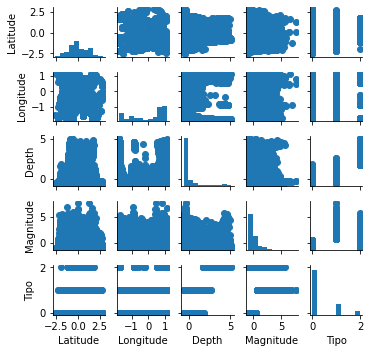

In [123]:
g = sns.PairGrid(data=sismosdf, height=1)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

In [81]:
fig = px.scatter(data_frame=sismosdf,
                    x='Depth',
                    y='Magnitude',
                    template='seaborn',
                    title='Magnitud vs Profundidad',
                    width=1000,
                    height=500
)
# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=25))
fig.update_traces(marker=dict(size=8),
                  selector=dict(mode='markers'))
pio.show(fig)

#### Determinar el número de clusters adecuados

In [82]:
X = np.array(sismosdf[['Depth','Magnitude']])

Nc = range(1, 10)
SSD = []
for i in Nc:
  kmeans = KMeans(n_clusters=i) 
  kmeans = kmeans.fit(X)
  SSD.append(kmeans.inertia_)


fig=go.Figure(layout=go.Layout(
        title=go.layout.Title(text="Gráfica del codo")
    ))
fig.update_xaxes(title_text='Número de clusters')
fig.update_yaxes(title_text='Suma de distancias al cuadrado')
fig.add_scatter(x=pd.Series(Nc), y=pd.Series(SSD), mode='lines')
fig.update_layout(width=500, height=400, margin=dict(l=0, r=0, b=0, t=25))
pio.show(fig)

#### Ajuste de clusterización y cálculo de centroides

In [119]:
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[-0.2250592  -0.40182526]
 [-0.22396512  1.64349457]
 [ 3.70566802  0.09708254]]


#### Cálculo de clusters

In [120]:
labels = kmeans.predict(X)
print(pd.Series(labels).unique())

[0 1 2]


#### Creación de nuevo dataframe con etiquetas de clusters

In [121]:
sismosdf['Tipo'] = labels
sismosdf.head()

,Latitude,Longitude,Depth,Magnitude,Tipo
0,0.596744,0.841914,0.490267,0.276489,0
1,0.015925,0.696672,0.070638,-0.195184,0
2,-0.733931,-1.699558,-0.417303,0.748162,1
3,-2.020233,-0.503407,-0.457964,-0.195184,0
4,0.352562,0.689316,-0.457964,-0.195184,0


#### Visualización de los clusters

In [124]:
fig = px.scatter(data_frame=sismosdf,
                    x='Depth',
                    y='Magnitude',
                    color='Tipo',
                    color_continuous_scale=["red", "green", "blue"],
                    template='seaborn',
                    title='Clusterización de sismos')
fig.update_layout(margin=dict(l=0, r=0, b=0, t=25))
fig.update_traces(marker=dict(size=6),
                  selector=dict(mode='markers'))
fig.add_scatter(x=pd.Series(centroids[:,0]), y=pd.Series(centroids[:,1]), 
                mode='markers', marker = dict(size = 20, color = 'magenta', symbol = 'star'), name="centroide")

pio.show(fig)